In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
import plotly.express as px
import sort_dataframeby_monthorweek as sd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, silhouette_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.drop(['agent','company'],axis=1,inplace=True)

In [8]:
df['country'].value_counts().index[0]

'PRT'

In [9]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [10]:
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time ..

### bcz if 3 entities are 0 ,then how can a booking be possible ??

In [13]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
data.shape

(119210, 30)

In [17]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


## Booking Trends Analysis

In [18]:
# Convert arrival date columns to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

# Verify the conversion
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


In [19]:
# Group by month and year for trends
monthly_bookings = df.resample('M', on='arrival_date').size()

# Display monthly bookings
monthly_bookings.head()

arrival_date
2015-07-31    2776
2015-08-31    3889
2015-09-30    5114
2015-10-31    4957
2015-11-30    2340
Freq: ME, dtype: int64

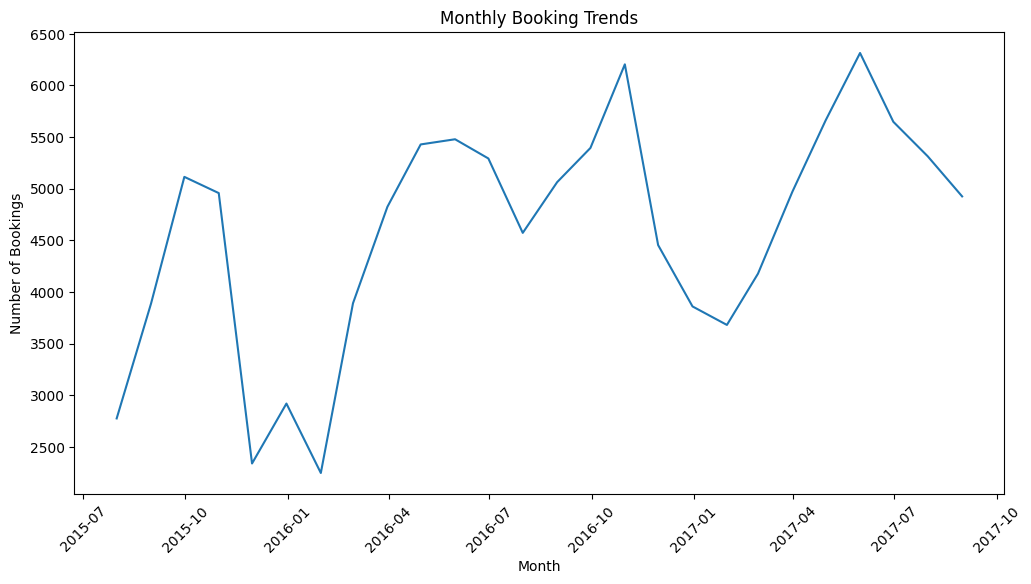

In [20]:
# Plot monthly booking trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings)
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### Key Observations

- **Seasonal Fluctuations:** The data shows noticeable peaks and troughs, indicating seasonal demand.
- **Peak Periods:** There's a recurrent pattern where bookings surge during specific months each year.
- **Decline Patterns:** Certain periods see a dip in bookings, possibly due to off-season factors.

### Conclusion

The insights from the booking trends analysis can guide marketing strategies, resource allocation, and revenue management by anticipating high and low demand periods.

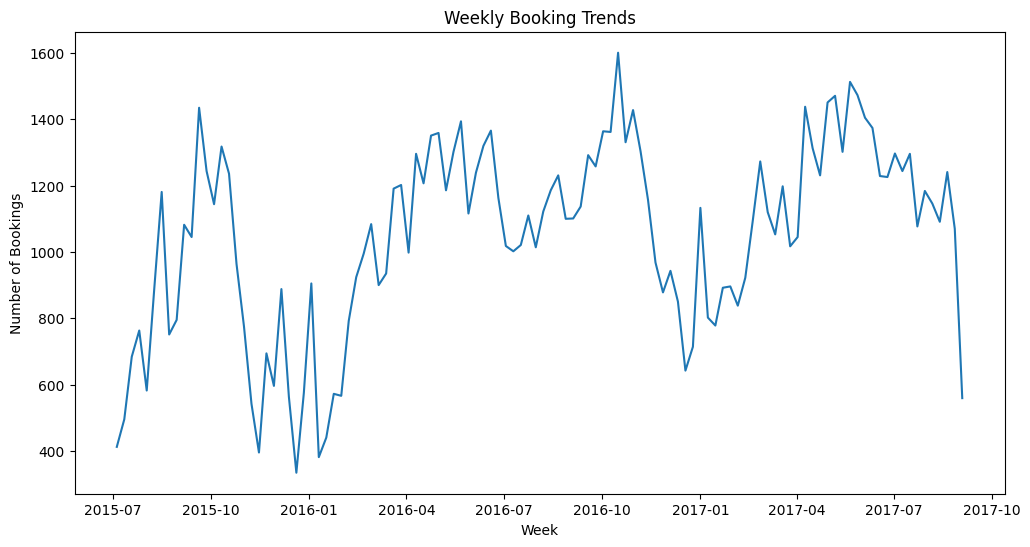

In [21]:
# Additional analyses can be done here, like weekly trends or hotel-type comparisons

# Weekly bookings trend
weekly_bookings = df.resample('W', on='arrival_date').size()

# Plot weekly booking trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_bookings)
plt.title('Weekly Booking Trends')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.show()

#### Key Observations

- **Fluctuations:** The data shows weekly variability, highlighting both spikes and dips.
- **Regular Peaks:** There are several high booking weeks throughout the year.
- **Consistent Dips:** Certain weeks consistently show lower booking numbers, possibly due to off-peaks.

#### Conclusion

Monitoring weekly trends provides more granular insights, helping in short-term planning and immediate operational adjustments. This aids in optimizing staffing, inventory, and resources to match demand.

## Where do the guests come from ?

In [22]:
data['is_canceled'].unique()

array([0, 1])

In [23]:
data[data['is_canceled']==0]['country'].value_counts()/75011

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [24]:
len(data[data['is_canceled']==0])

75011

In [25]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [26]:
init_notebook_mode(connected=True)

In [143]:
map_guest=px.choropleth(country_wise_data,
locations=country_wise_data['country'],
color=country_wise_data['no_of_guests'],
hover_name=country_wise_data['country'],
title='home country of guests'
)

In [144]:
map_guest.show()

### Conclusion : People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

## How much do guests pay for a room per night ?

#### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [29]:
data2=data[data['is_canceled']==0]

In [30]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

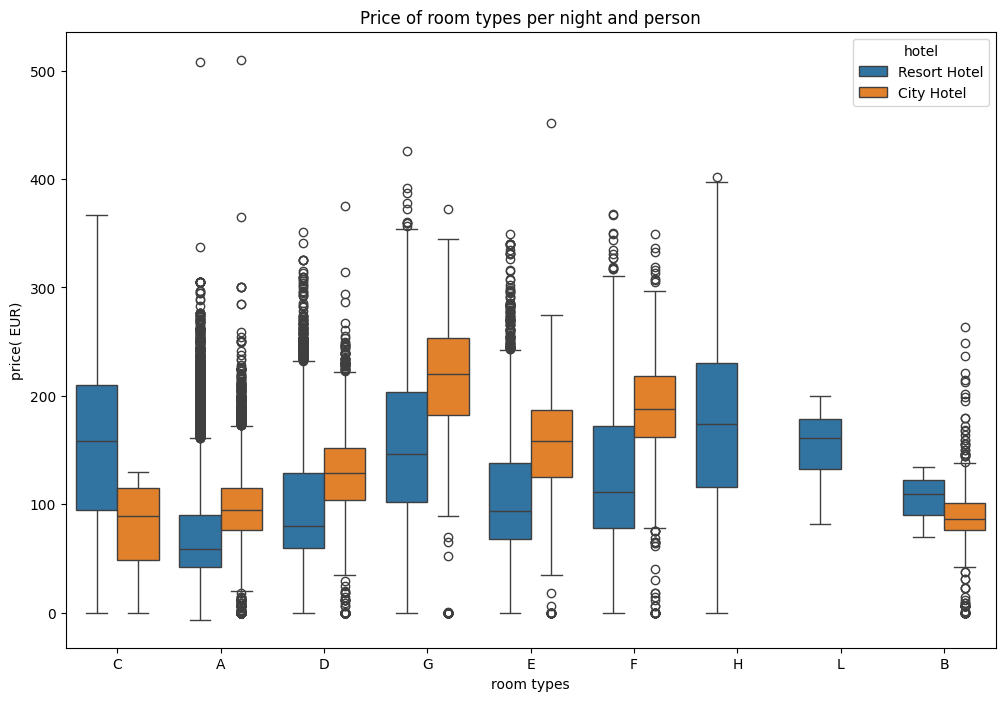

In [31]:
# seaborn boxplot:

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

#### This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## Which are the most busy month ?

In [32]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [33]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [34]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [35]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [36]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [37]:
final_rush=rush_resort.merge(rush_city,on='month')

In [38]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [39]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


#### Now we observe over here that the month column is not in order & if we will visualise, we will get improper conclusion so very first we have to provide right hierarchy to the month column

In [40]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [41]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [42]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

#### Conclusion: This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)., The price of the city hotel varies less and is most expensive during spring and autumn.

## Which month has the highest adr?

In [43]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

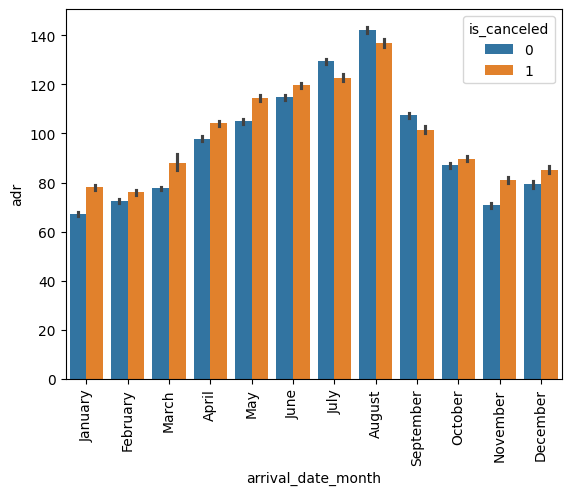

In [44]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

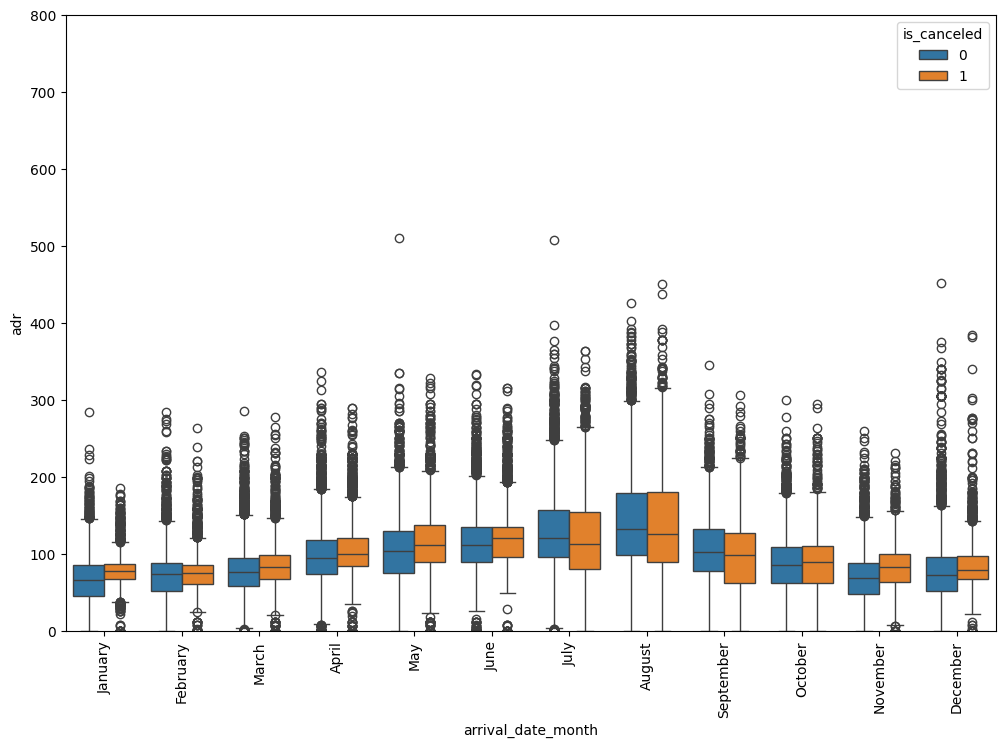

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

## Revenue Analysis:
Let us examine which factors most affect ADR (Average Daily Rate) and overall revenue.

In [46]:
# Calculate total revenue per booking
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

# Check the new column
df[['adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'total_revenue']].head()

,adr,stays_in_week_nights,stays_in_weekend_nights,total_revenue
0,0.0,0,0,0.0
1,0.0,0,0,0.0
2,75.0,1,0,75.0
3,75.0,1,0,75.0
4,98.0,2,0,196.0


In [47]:
# Ensure arrival_date is in datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

# Group by month for revenue trends
monthly_revenue = df.resample('M', on='arrival_date')['total_revenue'].sum()

# Display the monthly revenue
monthly_revenue.head()

arrival_date
2015-07-31    1146861.53
2015-08-31    1698555.34
2015-09-30    1666155.39
2015-10-31    1170206.08
2015-11-30     462989.38
Freq: ME, Name: total_revenue, dtype: float64

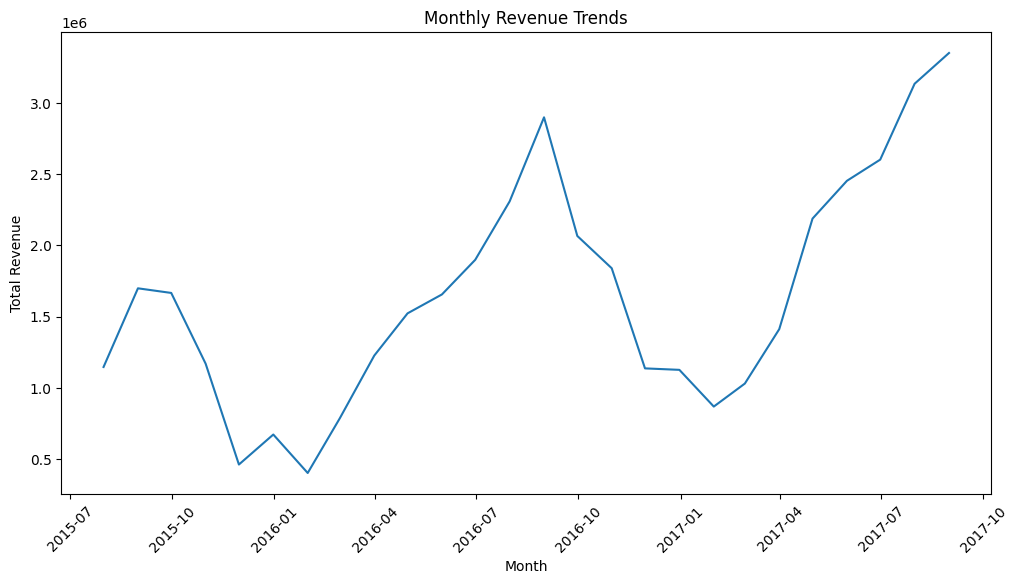

In [48]:
# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue)
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Key Observations

- **Revenue Peaks:** Significant increases in revenue can be observed during specific months.
- **Seasonal Declines:** There are noticeable declines in revenue corresponding to certain periods, indicating potential off-peak times.
- **Growth Trend:** An upward trend in revenue is noted towards the end of the observed period.

#### Conclusion

Understanding monthly revenue trends allows for strategic planning in marketing, budget allocation, and resource management to optimize revenue generation during peak and off-peak periods.

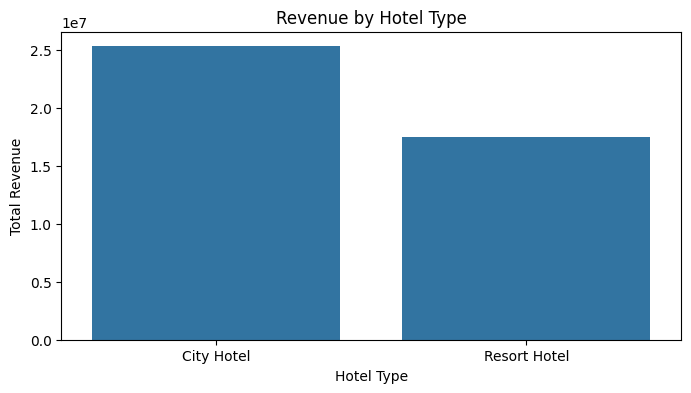

In [49]:
# Compare revenue by hotel type
revenue_by_hotel = df.groupby('hotel')['total_revenue'].sum()

# Plot revenue by hotel type
plt.figure(figsize=(8, 4))
sns.barplot(x=revenue_by_hotel.index, y=revenue_by_hotel.values)
plt.title('Revenue by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Revenue')
plt.show()

#### Key Observations

- **City Hotel:** Generates higher total revenue compared to Resort Hotel.
- **Revenue Distribution:** Indicates a preference or higher demand for city hotel stays.

#### Conclusion

Understanding revenue distribution by hotel type helps in targeting marketing strategies, resource allocation, and improving service offerings to maximize overall revenue.

## Lets analyse whether bookings were made only for weekdays or for weekends or for both

In [50]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
# Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [53]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [54]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [55]:
data2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: count, dtype: int64

In [56]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [57]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [58]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [59]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [60]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [61]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

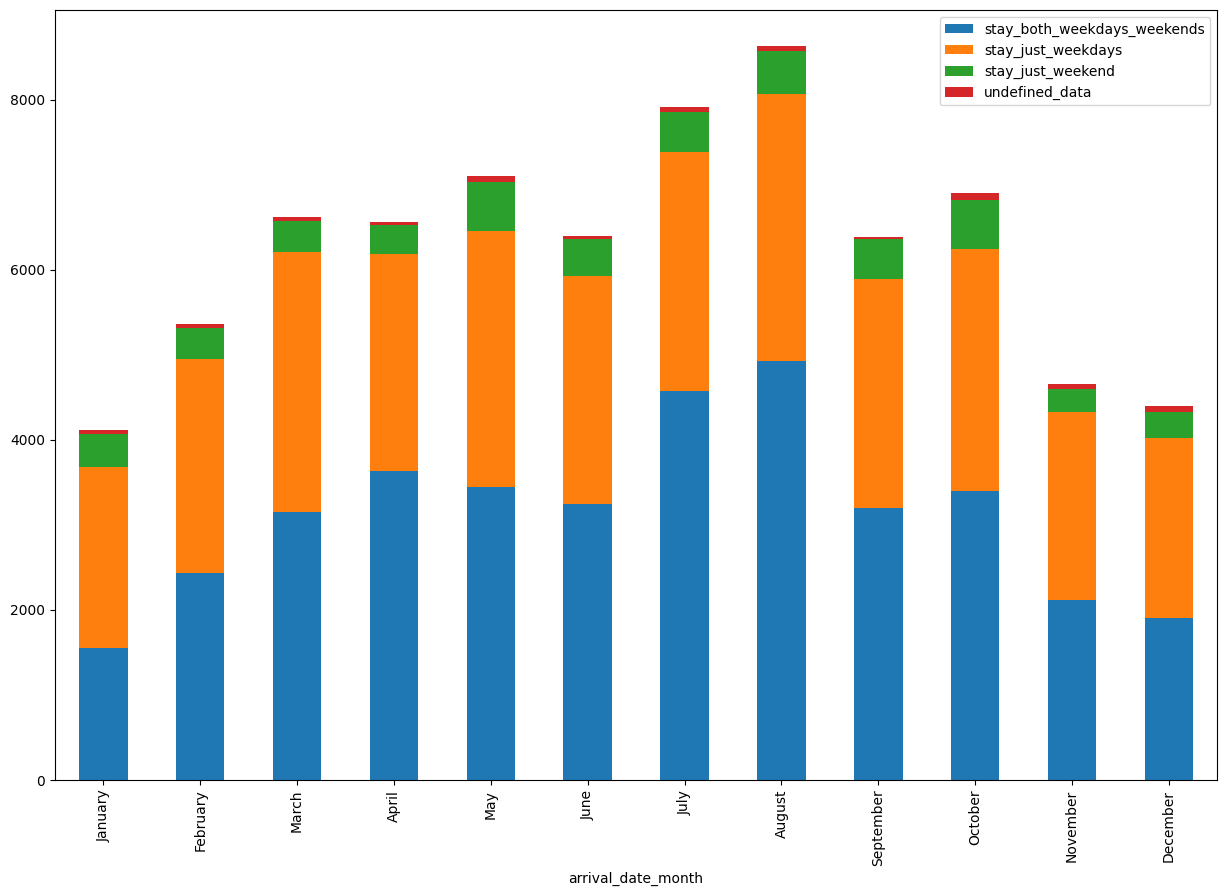

In [62]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

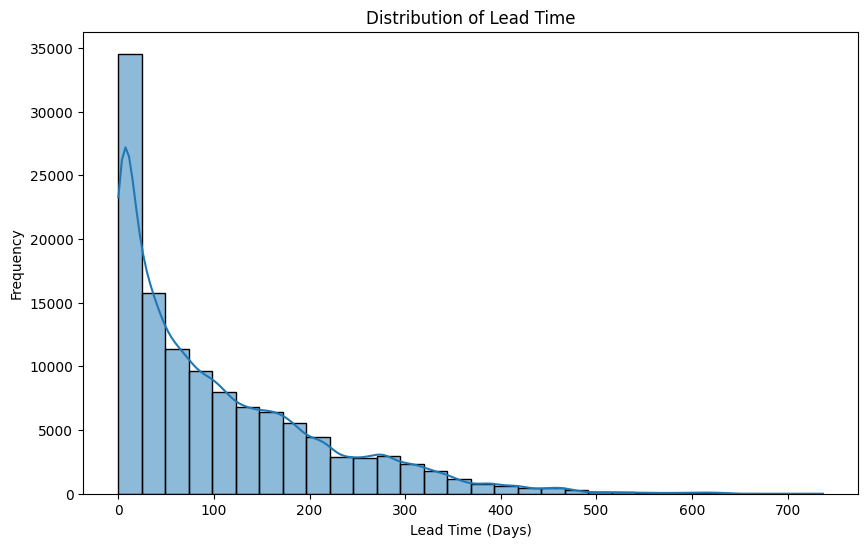

In [63]:
# Plot distribution of lead time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of booking lead times, illustrating how far in advance bookings are typically made.

#### Key Observations

- **Common Lead Times:** Most bookings are made with a lead time of fewer than 100 days.
- **Long Tail:** A smaller number of bookings are made well in advance, with lead times extending beyond 200 days.
- **Peak Frequency:** The highest frequency occurs at very short lead times, suggesting last-minute bookings are common.

#### Conclusion

Understanding lead time distribution helps in forecasting demand, managing inventory, and setting cancellation policies to optimize occupancy and revenue.


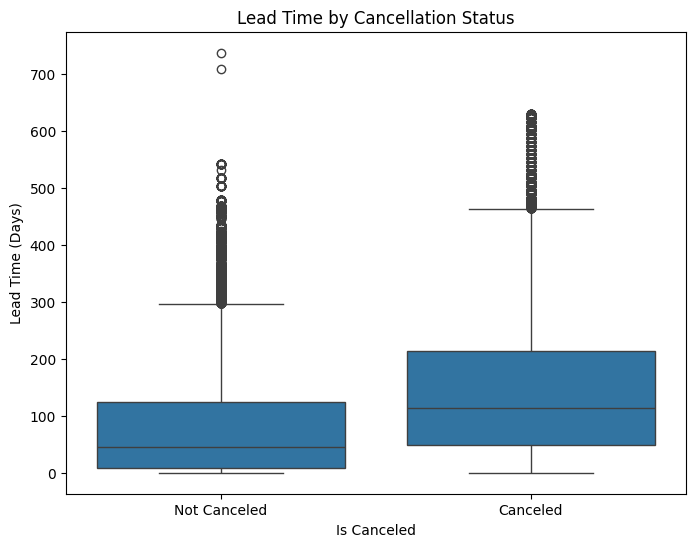

In [64]:
# Box plot of lead time by cancellation status
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time (Days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

The box plot above compares the lead times for bookings that were canceled versus those that were not.

#### Key Observations

- **Longer Lead Times for Canceled Bookings:** Canceled bookings tend to have a longer median lead time compared to non-canceled bookings.
- **Outliers:** There are more outliers in the canceled category, indicating variability in booking behavior.
- **Interquartile Range (IQR):** The IQR is wider for canceled bookings, suggesting more inconsistency in lead times.

#### Conclusion

The analysis suggests that bookings with longer lead times are more prone to cancellation. This insight can guide the development of cancellation policies and pricing strategies to mitigate revenue loss.


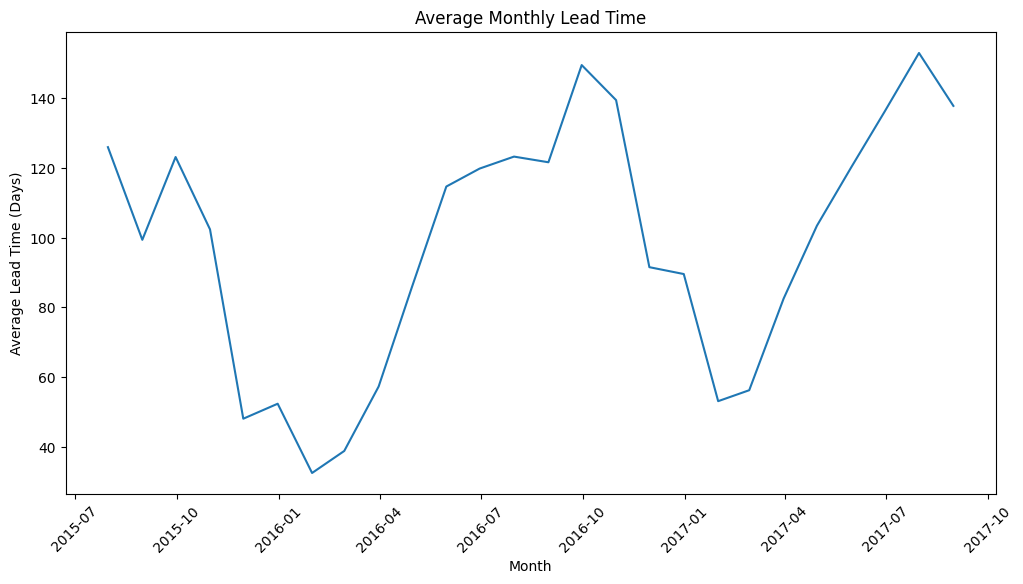

In [65]:
# Convert dates if not done yet
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

# Monthly average lead time
monthly_lead_time = df.resample('M', on='arrival_date')['lead_time'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_lead_time)
plt.title('Average Monthly Lead Time')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()

The line chart above depicts the average lead time for bookings on a monthly basis.

#### Key Observations

- **Fluctuations:** There are noticeable variations in lead time across different months.
- **Peaks and Troughs:** Certain months show peaks in lead time, while others show significant drops.
- **Seasonal Trends:** The lead time appears to increase during specific seasons, suggesting early booking behavior.

#### Conclusion

Understanding monthly lead time trends can assist in optimizing inventory management and pricing strategies. It helps anticipate customer booking behavior and align marketing efforts accordingly.


## Market Channel Analysis

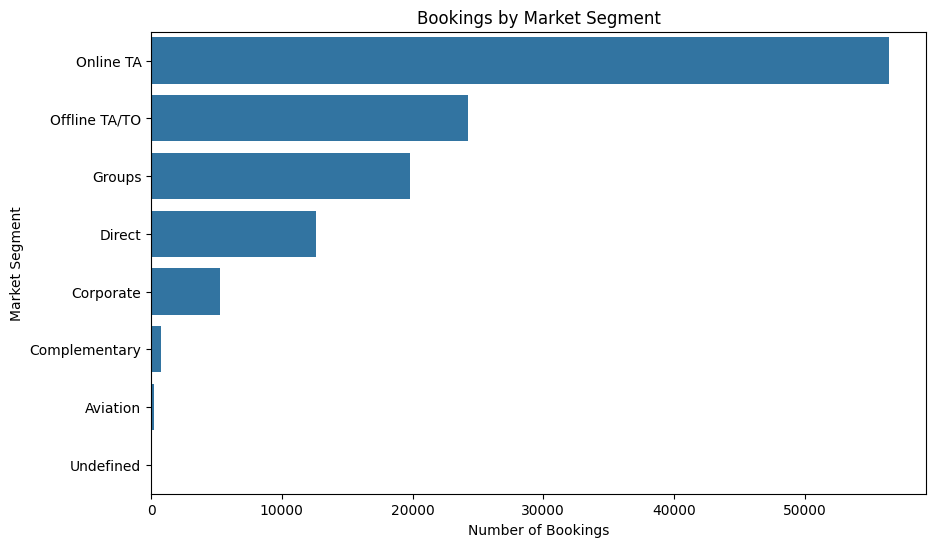

In [66]:
# Plot distribution of market segments
plt.figure(figsize=(10, 6))
sns.countplot(y='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title('Bookings by Market Segment')
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.show()

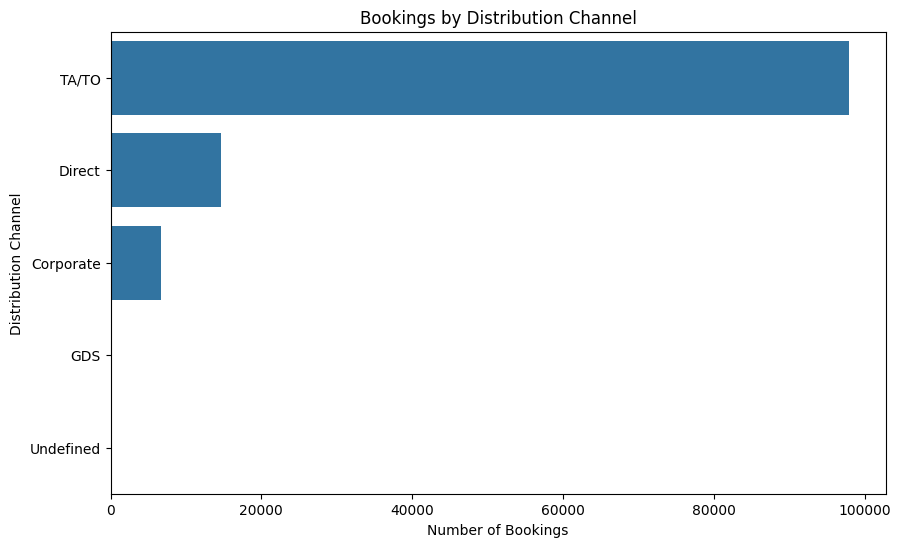

In [67]:
# Plot distribution of distribution channels
plt.figure(figsize=(10, 6))
sns.countplot(y='distribution_channel', data=df, order=df['distribution_channel'].value_counts().index)
plt.title('Bookings by Distribution Channel')
plt.xlabel('Number of Bookings')
plt.ylabel('Distribution Channel')
plt.show()

### Bookings by Market Segment

The bar chart above displays the distribution of bookings across different market segments.

#### Key Observations

- **Dominant Segment:** Online TA is the leading market segment for bookings.
- **Diverse Audience:** A variety of segments contribute to overall bookings, indicating a wide target audience.
- **Growth Opportunities:** Segments with fewer bookings present opportunities for targeted growth strategies.

### Bookings by Distribution Channel

The bar chart above illustrates the distribution of bookings across various distribution channels.

#### Key Observations

- **Leading Channel:** TA/TO channels dominate the booking landscape.
- **Direct Bookings:** A significant number of bookings also come through direct channels, highlighting potential for direct marketing efforts.
- **Channel Optimization:** There may be room to optimize or expand lesser-used channels.


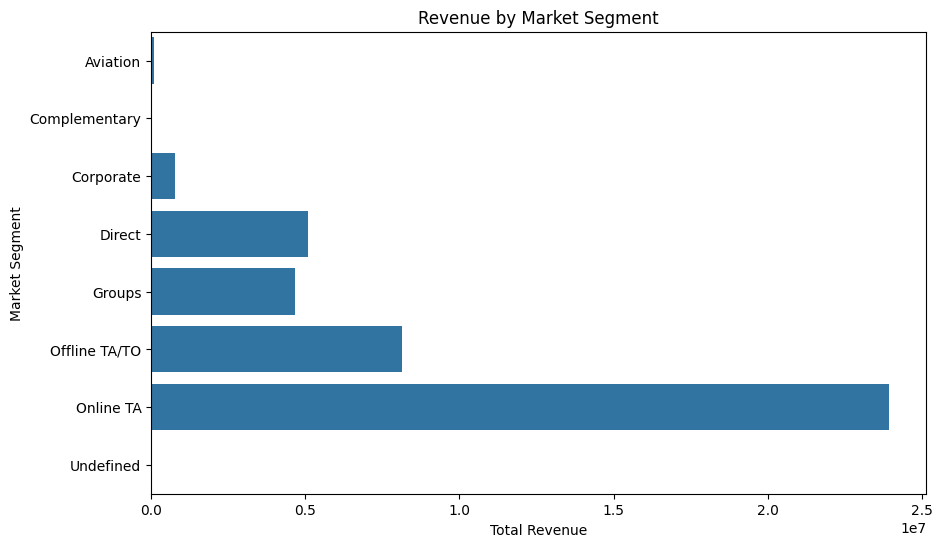

In [68]:
# Calculate total revenue by market segment
revenue_by_segment = df.groupby('market_segment')['total_revenue'].sum()

# Plot revenue by market segment
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_segment.values, y=revenue_by_segment.index)
plt.title('Revenue by Market Segment')
plt.xlabel('Total Revenue')
plt.ylabel('Market Segment')
plt.show()

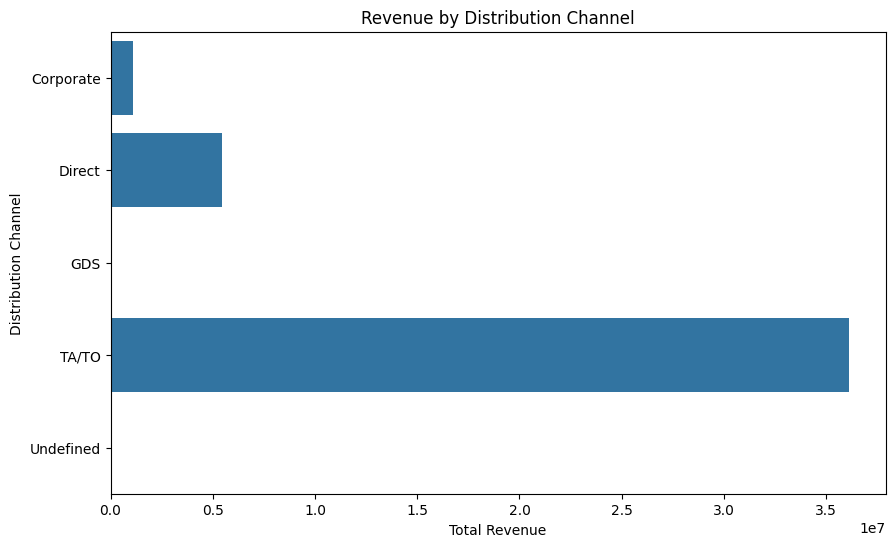

In [69]:
# Calculate total revenue by distribution channel
revenue_by_channel = df.groupby('distribution_channel')['total_revenue'].sum()

# Plot revenue by distribution channel
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_channel.values, y=revenue_by_channel.index)
plt.title('Revenue by Distribution Channel')
plt.xlabel('Total Revenue')
plt.ylabel('Distribution Channel')
plt.show()

### Revenue by Market Segment

The bar chart above illustrates the total revenue generated by each market segment.

#### Key Observations

- **Top Revenue Generator:** Online TA significantly leads in revenue generation.
- **Diverse Contributions:** Offline TA/TO and Direct segments also contribute substantially to total revenue.
- **Growth Potential:** Lesser segments may offer opportunities for targeted growth and marketing strategies.

### Revenue by Distribution Channel

The bar chart above displays the total revenue generated by each distribution channel.

#### Key Observations

- **Dominant Channel:** TA/TO channels are the primary revenue drivers.
- **Direct Channel Importance:** Direct channels also contribute significantly to revenue, underscoring potential for direct marketing efforts.
- **Channel Enhancement:** Minor channels present opportunities for strategic optimization to increase revenue.

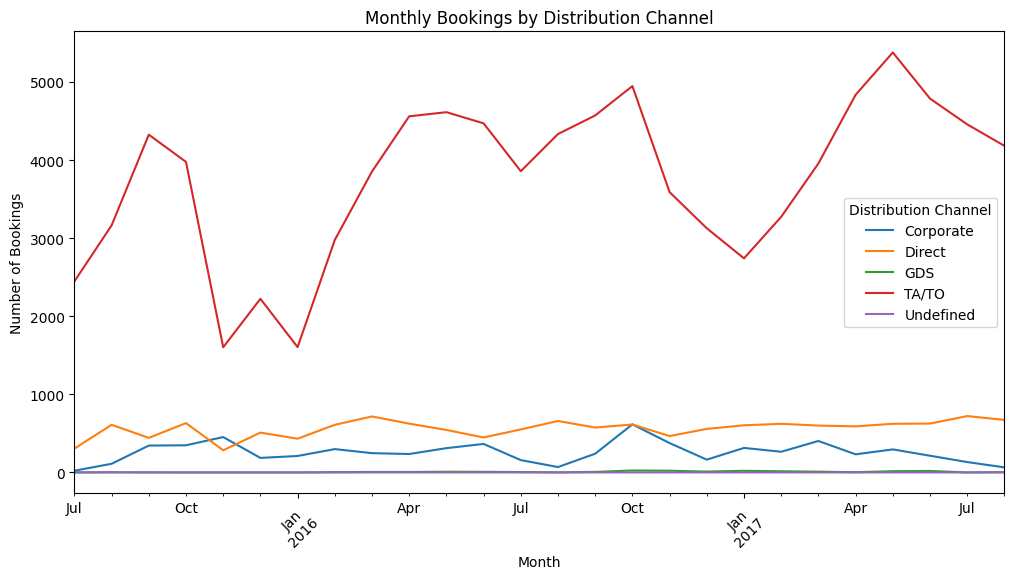

In [70]:
# Convert date columns if necessary
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

# Monthly bookings by channel
monthly_channel_usage = df.resample('M', on='arrival_date')['distribution_channel'].value_counts().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
monthly_channel_usage.plot(kind='line', ax=plt.gca())
plt.title('Monthly Bookings by Distribution Channel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Distribution Channel')
plt.xticks(rotation=45)
plt.show()

### Monthly Bookings by Distribution Channel

The line chart above illustrates the number of bookings per month across different distribution channels.

#### Key Observations

- **TA/TO Dominance:** TA/TO channels consistently lead in monthly bookings.
- **Stable Channels:** Direct and Corporate channels show consistent, albeit lower, booking volumes.
- **Seasonal Trends:** There are observable peaks and troughs in TA/TO bookings, indicating seasonal demand patterns.

#### Conclusion

Understanding monthly trends by distribution channel helps in optimizing strategies for channel-specific marketing and resource allocation to maximize occupancy and revenue.

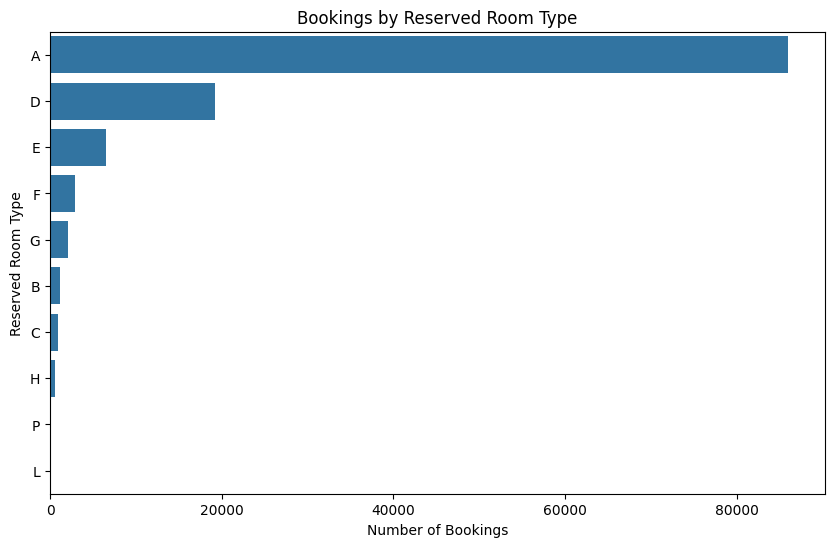

Number of discrepancies between reserved and assigned room types: 14917


In [71]:
# Room type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='reserved_room_type', data=df, order=df['reserved_room_type'].value_counts().index)
plt.title('Bookings by Reserved Room Type')
plt.xlabel('Number of Bookings')
plt.ylabel('Reserved Room Type')
plt.show()

# Discrepancies between reserved and assigned
discrepancies = df[df['reserved_room_type'] != df['assigned_room_type']].shape[0]

print(f"Number of discrepancies between reserved and assigned room types: {discrepancies}")

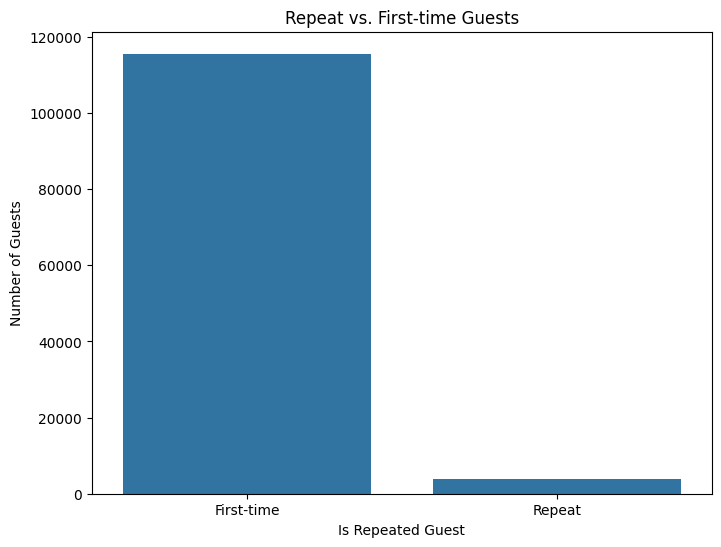

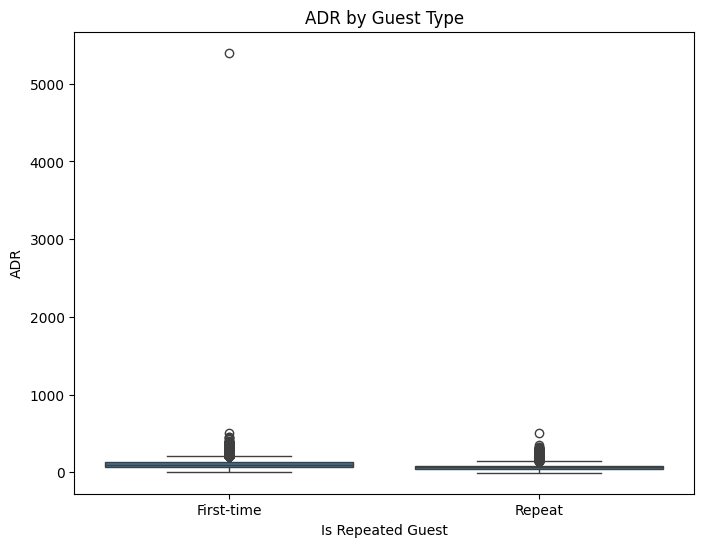

In [72]:
# Repeat guest distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_repeated_guest', data=df)
plt.title('Repeat vs. First-time Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Number of Guests')
plt.xticks([0, 1], ['First-time', 'Repeat'])
plt.show()

# ADR by guest type
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_repeated_guest', y='adr', data=df)
plt.title('ADR by Guest Type')
plt.xlabel('Is Repeated Guest')
plt.ylabel('ADR')
plt.xticks([0, 1], ['First-time', 'Repeat'])
plt.show()

### Repeat vs. First-time Guests

The bar chart above compares the number of first-time guests to repeat guests.

#### Key Observations

- **First-time Dominance:** First-time guests significantly outnumber repeat guests.
- **Guest Retention Opportunity:** The disparity suggests potential for improving guest retention strategies.

### ADR by Guest Type

The box plot above compares the Average Daily Rate (ADR) for first-time guests versus repeat guests.

#### Key Observations

- **Similar ADR Median:** Both guest types display similar median ADRs.
- **Outliers:** Some outliers exist, particularly in the first-time guest group, suggesting occasional high-value stays.

#### Conclusion

Understanding the dynamics between repeat and first-time guests can help tailor marketing strategies, enhance guest loyalty programs, and optimize pricing tactics.

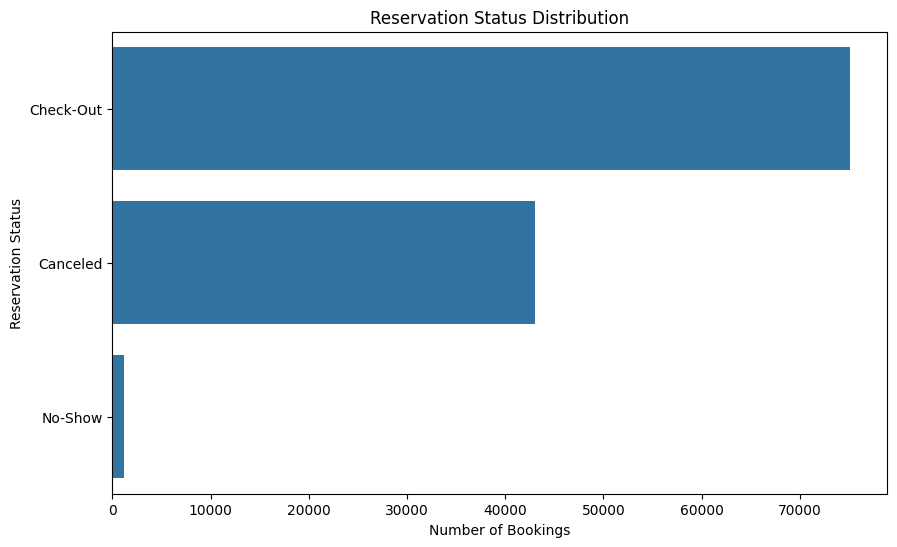

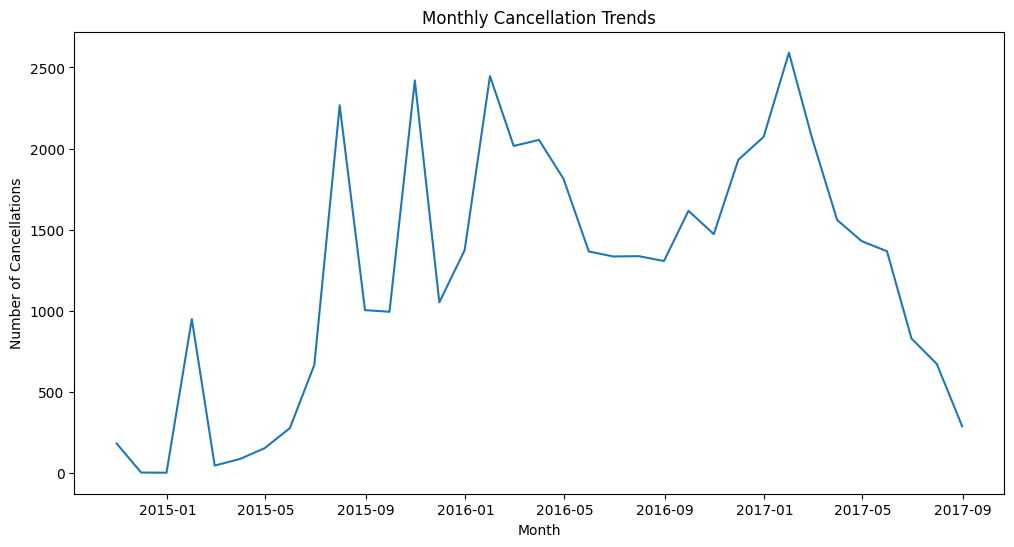

In [73]:
# Reservation status distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='reservation_status', data=df, order=df['reservation_status'].value_counts().index)
plt.title('Reservation Status Distribution')
plt.xlabel('Number of Bookings')
plt.ylabel('Reservation Status')
plt.show()

# Cancellation trends over time (if applicable)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
canceled_trends = df[df['reservation_status'] == 'Canceled'].resample('M', on='reservation_status_date').size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=canceled_trends)
plt.title('Monthly Cancellation Trends')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.show()

### Reservation Status Distribution

The bar chart above shows the distribution of various reservation statuses.

#### Key Observations

- **Check-Outs Lead:** The majority of reservations resulted in check-out.
- **High Cancellation Rate:** A significant portion of bookings are canceled.
- **Low No-Show Incidence:** No-shows represent a smaller part of the dataset.

### Monthly Cancellation Trends

The line chart above illustrates the monthly trend of reservation cancellations.

#### Key Observations

- **Seasonal Patterns:** Cancellations exhibit clear seasonal trends, with peaks in specific months.
- **Recent Decline:** A noticeable decline in cancellations is observed towards the end of the period.

#### Conclusion

Understanding reservation status distributions and cancellation trends can drive strategies to reduce cancellations, improve booking confirmations, and optimize hotel operations.

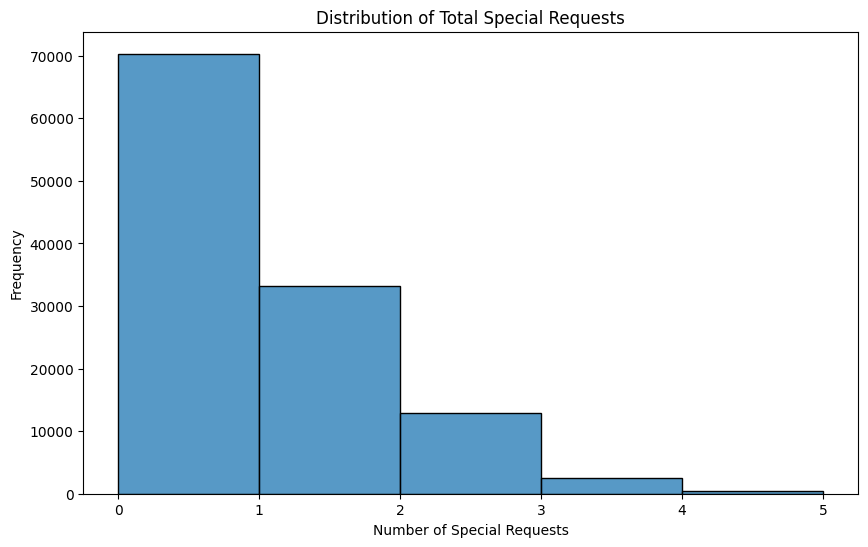

In [74]:
# Plot distribution of total special requests
plt.figure(figsize=(10, 6))
sns.histplot(df['total_of_special_requests'], bins=5, kde=False)
plt.title('Distribution of Total Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()

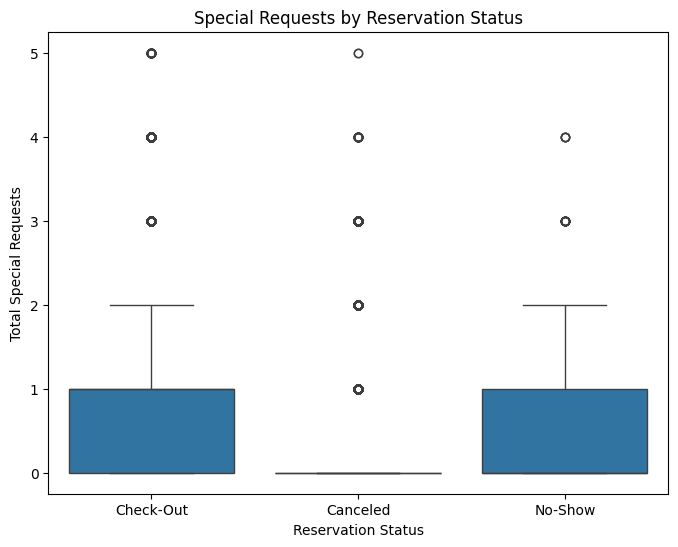

In [75]:
# Box plot of special requests by cancellation status
plt.figure(figsize=(8, 6))
sns.boxplot(x='reservation_status', y='total_of_special_requests', data=df)
plt.title('Special Requests by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Total Special Requests')
plt.show()

### Distribution of Total Special Requests

The histogram above shows how many special requests are made per booking.

#### Key Observations

- **Common Requests:** Most bookings have between 0 to 1 special requests.
- **Few Requests:** Requests sharply decline beyond two, indicating limited special requests per booking.

### Special Requests by Reservation Status

The box plot above compares special requests across different reservation statuses.

#### Key Observations

- **Check-Out Bookings:** Typically have more special requests compared to canceled or no-show bookings.
- **Outliers:** There are outliers with more special requests in all categories, suggesting occasional high-demand scenarios.

#### Conclusion

Understanding the distribution and impact of special requests can aid in optimizing resource allocation and improving customer satisfaction by anticipating guest needs.

## How to create some more features?

In [76]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [77]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [78]:
data['is_family']=data.apply(family,axis=1)

In [79]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [80]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [81]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [82]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [83]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [84]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [85]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [86]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

## How to apply Feature encoding on data 

In [87]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [88]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [89]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [90]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [91]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [92]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [93]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [94]:
data_cat=data[cate_features]

In [95]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [96]:
data_cat['cancellation']=data['is_canceled']

In [97]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [98]:
cols=data_cat.columns

In [99]:
cols=cols[0:-1]

In [100]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [101]:
# Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [102]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


## Handle Outliers 

In [103]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [104]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [105]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [106]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [107]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<Axes: xlabel='lead_time', ylabel='Density'>

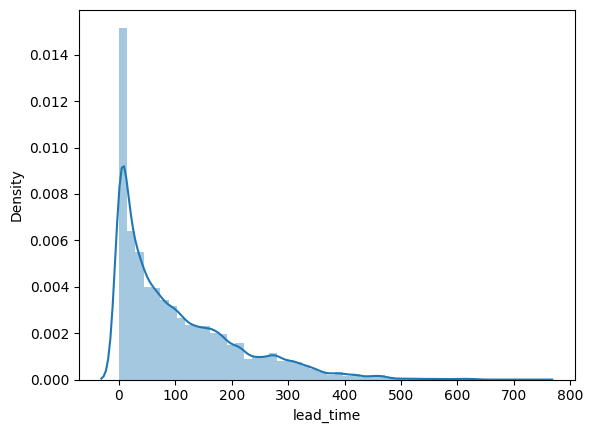

In [108]:
sns.distplot(dataframe['lead_time'])

In [109]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [110]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

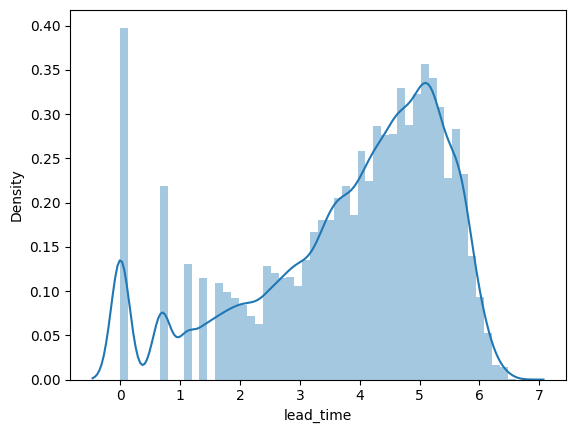

In [111]:
sns.distplot(dataframe['lead_time'])

## ADR

<Axes: xlabel='adr', ylabel='Density'>

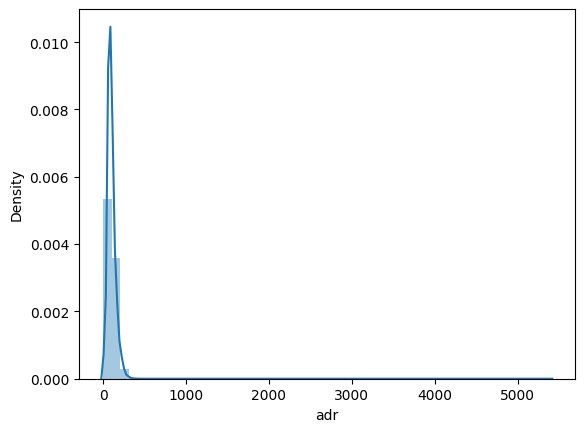

In [112]:
sns.distplot(dataframe['adr'])

In [113]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [114]:
handle_outlier('adr')

In [115]:
dataframe['adr'].isnull().sum()

1

<Axes: xlabel='adr', ylabel='Density'>

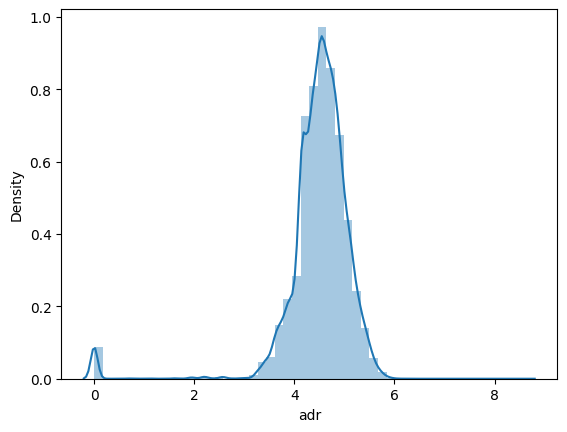

In [116]:
sns.distplot(dataframe['adr'].dropna())

## Select important Features using Co-relation & univariate analysis..

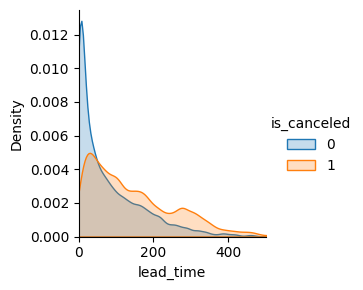

In [117]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [118]:
corr=dataframe.corr()

In [119]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [120]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [121]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [122]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [123]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [124]:
dataframe.shape

(119210, 24)

## Customer Segmentation based on booking behaviours

In [125]:
# Select features for clustering
features = df[['lead_time', 'adr', 'total_of_special_requests', 'previous_cancellations',
               'stays_in_week_nights', 'stays_in_weekend_nights']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

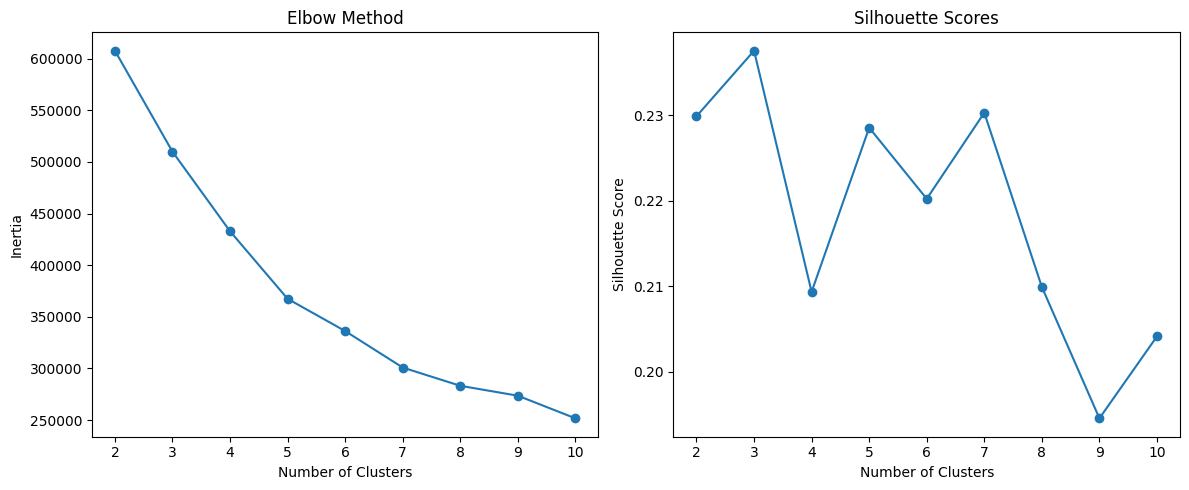

In [126]:
# Initialize lists to store results
inertia = []
silhouette_scores = []

# Test different numbers of clusters
for n in range(2, 11):  # Starting from 2 since silhouette score isn't defined for n=1
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Compute inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Plot inertia and silhouette score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

         is_canceled   lead_time  arrival_date_year  arrival_date_week_number  \
cluster                                                                         
0           0.393610   98.085396        2016.115342                 26.698458   
1           0.315063  117.018399        2016.254778                 28.199664   
2           0.993103  229.703448        2015.082759                 34.531034   

         arrival_date_day_of_month  stays_in_weekend_nights  \
cluster                                                       
0                        15.776652                 0.535568   
1                        15.871951                 1.820715   
2                         9.655172                 1.055172   

         stays_in_week_nights    adults  children    babies  ...  \
cluster                                                      ...   
0                    1.821727  1.795292  0.067371  0.004355  ...   
1                    4.045846  1.995132  0.187536  0.016171  ...   
2     

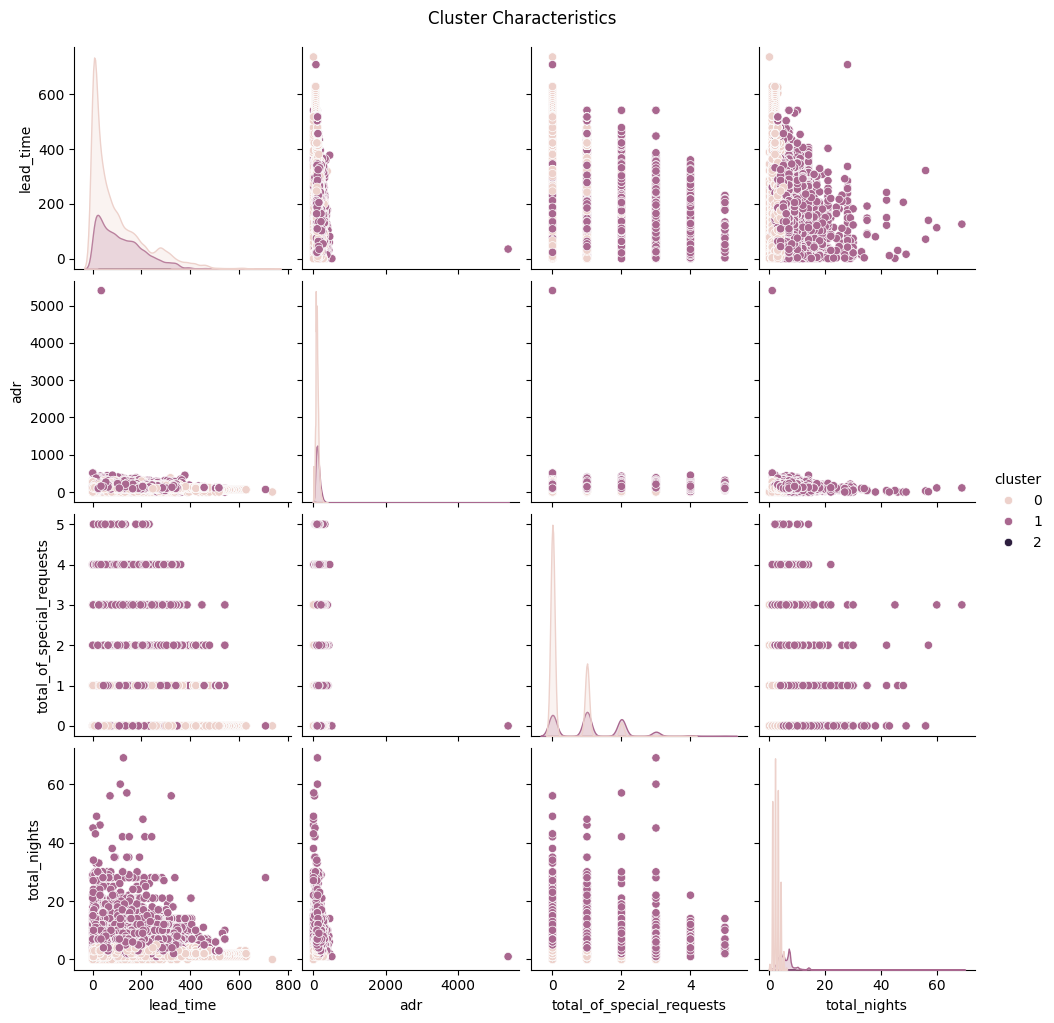

In [132]:
# Choose optimal clusters from Elbow and Silhouette analysis
optimal_clusters = 3  # Replace with your chosen number


# Calculate total_nights if not already done
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Check if your dataframe has cluster labels
if 'cluster' not in df:
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(scaled_features)

# Group by cluster and calculate the mean for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
cluster_summary = df.groupby('cluster')[numeric_cols].mean()

print(cluster_summary)

# Visualize clusters using a pair plot
sns.pairplot(df, hue='cluster', vars=['lead_time', 'adr', 'total_of_special_requests', 'total_nights'])
plt.suptitle('Cluster Characteristics', y=1.02)
plt.show()

### Cluster Characteristics

The pair plot above illustrates the characteristics of each cluster across selected features.

#### Key Observations

- **Lead Time vs. Total Nights:** Clusters exhibit distinct patterns regarding booking lead times and total stay duration.
- **ADR Patterns:** Average Daily Rate varies significantly across clusters, indicating different pricing strategies or segments.
- **Special Request Behavior:** The number of special requests shows varying trends within clusters, suggesting differences in customer needs and preferences.

#### Conclusion

This visualization highlights the differences in customer behavior and preferences. These insights can guide targeted marketing strategies and improve customer satisfaction by tailoring services to each cluster's characteristics.

## Finding important features for model building

In [133]:
dataframe.dropna(inplace=True)

In [134]:
X = dataframe.drop('is_canceled', axis=1)
y = dataframe['is_canceled']

In [135]:
# Feature selection using Lasso
lasso = Lasso(alpha=0.005)
feature_sel_model = SelectFromModel(lasso)
feature_sel_model.fit(X, y)

selected_features = X.columns[feature_sel_model.get_support()]
X = X[selected_features]

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

In [139]:
for name, model in models:
    print(f'\n{name}')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    
    print(f'Confusion Matrix:\n{cm}')
    print(f'Accuracy: {acc:.4f}')
    print(classification_report(y_test, predictions))
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f'ROC-AUC Score: {roc_auc:.4f}')


Logistic Regression
Confusion Matrix:
[[17237  1490]
 [ 4577  6499]]
Accuracy: 0.7964
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     18727
           1       0.81      0.59      0.68     11076

    accuracy                           0.80     29803
   macro avg       0.80      0.75      0.77     29803
weighted avg       0.80      0.80      0.79     29803

ROC-AUC Score: 0.8609

Naive Bayes
Confusion Matrix:
[[ 6744 11983]
 [  652 10424]]
Accuracy: 0.5760
              precision    recall  f1-score   support

           0       0.91      0.36      0.52     18727
           1       0.47      0.94      0.62     11076

    accuracy                           0.58     29803
   macro avg       0.69      0.65      0.57     29803
weighted avg       0.75      0.58      0.56     29803

ROC-AUC Score: 0.8397

Random Forest
Confusion Matrix:
[[17176  1551]
 [ 2769  8307]]
Accuracy: 0.8550
              precision    recall  f1-score   support



### Conclusion
- **Best Model:** Random Forest shows the highest ROC-AUC score and overall performance.
- **Insights:** While Logistic Regression provides a solid baseline, Random Forest excels in both recall and precision.
- **Recommendations:** Consider refining Random Forest parameters for potential improvements.

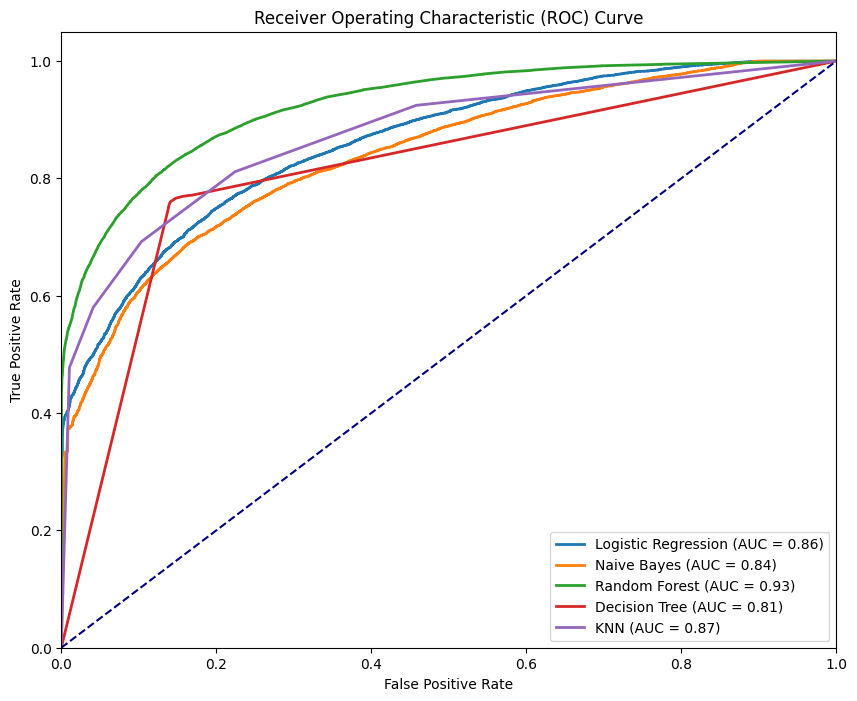

In [141]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

for name, model in models:
    if hasattr(model, "predict_proba"):
        model.fit(X_train, y_train)
        y_score = model.predict_proba(X_test)[:, 1]
        
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
        
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Cancellation Prediction Analysis

## Overview

The goal of this project was to build a predictive model to effectively forecast hotel booking cancellations. We explored various machine learning algorithms, assessed their performance, and identified the most suitable model for deployment.

## Feature Selection

- **Technique:** Lasso Regression
- **Outcome:** Reduced dimensionality by retaining only features with significant predictive power, enhancing model performance.

## Model Evaluation Results

### Performance Metrics:

1. **Logistic Regression:**
   - **Accuracy:** 0.80
   - **ROC-AUC Score:** 0.86

2. **Naive Bayes:**
   - **Accuracy:** 0.58
   - **ROC-AUC Score:** 0.84

3. **Random Forest:**
   - **Accuracy:** 0.86
   - **ROC-AUC Score:** 0.93

4. **Decision Tree:**
   - **Accuracy:** 0.82
   - **ROC-AUC Score:** 0.81

5. **K-Nearest Neighbors (KNN):**
   - **Accuracy:** 0.82
   - **ROC-AUC Score:** 0.87

### Visualization

- **Insight:** The ROC curve comparison shows Random Forest with the highest Area Under Curve (AUC), indicating superior performance in differentiating cancellations.

## Conclusion

- **Best Performing Model:** Random Forest emerged as the most robust model with high accuracy and ROC-AUC, making it the ideal choice for deployment.
- **Recommendation:** Prioritize the further refinement of Random Forest through hyperparameter tuning and feature engineering for even greater accuracy.
- **Next Steps:** Consider deploying the model into a production pipeline for real-time cancellation prediction, enhancing operational decision-making and customer service strategies.

This analysis demonstrates the potential for machine learning to transform hotel booking management, reducing cancellations and optimizing resource allocation.